## 전세계 코로나 확진자 데이터 분석

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

#### 데이터 로드

In [99]:
covid2020_df = pd.read_csv("101_DT_COVID19_004_20211001150023.csv", encoding="euc-kr")
covid2021_df = pd.read_csv("101_DT_COVID19_004_20211001150440.csv", encoding="euc-kr")

In [100]:
covid2020_df

,국가별,항목,단위,2020. 05. 01,2020. 05. 02,2020. 05. 03,2020. 05. 04,2020. 05. 05,2020. 05. 06,2020. 05. 07,...,2020. 12. 22,2020. 12. 23,2020. 12. 24,2020. 12. 25,2020. 12. 26,2020. 12. 27,2020. 12. 28,2020. 12. 29,2020. 12. 30,2020. 12. 31
0,한국,확진자수,명,10774.0,10780.0,10793.0,10801.0,10793.0,10806.0,10810.0,...,51460.0,52550,53533,54770,55902.0,56872.0,57680.0,58725.0,59773,60740.0
1,한국,사망자수,명,248.0,250.0,250.0,252.0,250.0,255.0,256.0,...,722.0,739,756,773,793.0,808.0,819.0,859.0,879,900.0
2,아프가니스탄,확진자수,명,2171.0,2171.0,2469.0,2469.0,2469.0,3224.0,3392.0,...,50678.0,50888,51070,51357,51595.0,51764.0,51848.0,52007.0,52147,52330.0
3,아프가니스탄,사망자수,명,64.0,64.0,72.0,72.0,72.0,95.0,104.0,...,2074.0,2089,2105,2126,2135.0,2148.0,2158.0,2170.0,2182,2189.0
4,바레인,확진자수,명,3037.0,3169.0,3243.0,3356.0,3464.0,3679.0,3842.0,...,90282.0,90450,90634,90817,91070.0,91304.0,91518.0,91733.0,91935,92169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,솔로몬제도,사망자수,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,NaN,NaN,NaN,NaN,0,NaN
374,바누아투,확진자수,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,NaN,NaN,NaN,NaN,1,NaN
375,바누아투,사망자수,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,NaN,NaN,NaN,NaN,0,NaN
376,기타지역 영토,확진자수,명,5773.0,5991.0,6036.0,6284.0,6573.0,6666.0,6819.0,...,NaN,294612,297686,300748,NaN,NaN,NaN,NaN,313861,NaN


In [101]:
covid2021_df

,국가별,항목,단위,2021. 01. 01,2021. 01. 02,2021. 01. 03,2021. 01. 04,2021. 01. 05,2021. 01. 06,2021. 01. 07,...,2021. 09. 21,2021. 09. 22,2021. 09. 23,2021. 09. 24,2021. 09. 25,2021. 09. 28,2021. 09. 29,2021. 09. 30,2021. 10. 01,Unnamed: 221
0,한국,확진자수,명,61769.0,62593.0,63244.0,64264.0,64979.0,65818.0,66686.0,...,289263.0,290983.0,292699.0,295132.0,298402.0,305842.0,308725.0,311286.0,313773.0,NaN
1,한국,사망자수,명,917.0,942.0,962.0,981.0,1007.0,1027.0,1046.0,...,2413.0,2419.0,2427.0,2434.0,2441.0,2464.0,2474.0,2481.0,2497.0,NaN
2,아프가니스탄,확진자수,명,52330.0,52513.0,52586.0,52709.0,52909.0,53011.0,53105.0,...,154585.0,154712.0,154757.0,154800.0,154960.0,155072.0,155093.0,155128.0,155174.0,NaN
3,아프가니스탄,사망자수,명,2189.0,2201.0,2211.0,2221.0,2230.0,2237.0,2244.0,...,7199.0,7199.0,7199.0,7199.0,7199.0,7200.0,7201.0,7204.0,7204.0,NaN
4,바레인,확진자수,명,92425.0,92675.0,92913.0,NaN,93478.0,93766.0,93995.0,...,274264.0,274383.0,274452.0,274524.0,274524.0,274814.0,274877.0,274925.0,274981.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,솔로몬제도,사망자수,명,0.0,0.0,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
378,바누아투,확진자수,명,1.0,1.0,NaN,NaN,1.0,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN
379,바누아투,사망자수,명,0.0,0.0,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
380,기타지역 영토,확진자수,명,319585.0,321938.0,NaN,NaN,328058.0,NaN,NaN,...,941587.0,946639.0,950342.0,953733.0,956554.0,965894.0,969168.0,973105.0,975797.0,NaN


In [102]:
# 국가를 고유 키 값으로 만들기 위해 사망자수 행 제거
covid2020_df.drop(covid2020_df[covid2020_df["항목"] == "사망자수"].index, inplace=True)
covid2021_df.drop(covid2021_df[covid2021_df["항목"] == "사망자수"].index, inplace=True)

# 항목 & 단위 열 제거
covid2020_df.drop(["항목", "단위"], axis=1, inplace=True)
covid2021_df.drop(["항목", "단위"], axis=1, inplace=True)

# 병합
covid_df = pd.merge(covid2020_df, covid2021_df, on="국가별", how="inner")
display(covid_df)

,국가별,2020. 05. 01,2020. 05. 02,2020. 05. 03,2020. 05. 04,2020. 05. 05,2020. 05. 06,2020. 05. 07,2020. 05. 08,2020. 05. 09,...,2021. 09. 21,2021. 09. 22,2021. 09. 23,2021. 09. 24,2021. 09. 25,2021. 09. 28,2021. 09. 29,2021. 09. 30,2021. 10. 01,Unnamed: 221
0,한국,10774.0,10780.0,10793.0,10801.0,10793.0,10806.0,10810.0,10822.0,10840.0,...,289263.0,290983.0,292699.0,295132.0,298402.0,305842.0,308725.0,311286.0,313773.0,NaN
1,아프가니스탄,2171.0,2171.0,2469.0,2469.0,2469.0,3224.0,3392.0,3563.0,3563.0,...,154585.0,154712.0,154757.0,154800.0,154960.0,155072.0,155093.0,155128.0,155174.0,NaN
2,바레인,3037.0,3169.0,3243.0,3356.0,3464.0,3679.0,3842.0,4131.0,4404.0,...,274264.0,274383.0,274452.0,274524.0,274524.0,274814.0,274877.0,274925.0,274981.0,NaN
3,방글라데시,7103.0,7667.0,8238.0,8790.0,9455.0,10143.0,10929.0,11719.0,12425.0,...,1544238.0,1545800.0,1547176.0,1548320.0,1549553.0,1552563.0,1552563.0,1553873.0,1555911.0,NaN
4,부탄,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,2597.0,2599.0,2599.0,2599.0,2599.0,2599.0,2599.0,2600.0,2601.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,뉴질랜드,1129.0,1132.0,1134.0,1136.0,1136.0,1137.0,1138.0,1139.0,1141.0,...,3725.0,3739.0,3763.0,3779.0,3788.0,3838.0,3848.0,3892.0,3917.0,NaN
185,파푸아뉴기니,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,18933.0,18968.0,19069.0,19182.0,19278.0,19523.0,19703.0,19703.0,20221.0,NaN
186,솔로몬제도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,NaN
187,바누아투,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN


In [103]:
# 행·열 간 전환
covid_df = covid_df.transpose()

# 국가 이름을 행으로 설정
covid_df = covid_df.rename(columns=covid_df.iloc[0])
covid_df.drop(covid_df.index[0], inplace=True)
display(covid_df)

,한국,아프가니스탄,바레인,방글라데시,부탄,브루나이,캄보디아,중국,동티모르,홍콩,...,에스와티니,남수단,호주,피지,마셜제도,뉴질랜드,파푸아뉴기니,솔로몬제도,바누아투,기타지역 영토
2020. 05. 01,10774,2171,3037,7103,7,138,122,82874,24,1037,...,91,34,6746,18,NaN,1129,8,NaN,NaN,5773
2020. 05. 02,10780,2171,3169,7667,7,138,122,82875,24,1039,...,100,35,6762,18,NaN,1132,8,NaN,NaN,5991
2020. 05. 03,10793,2469,3243,8238,7,138,122,82877,24,1039,...,106,45,6767,18,NaN,1134,8,NaN,NaN,6036
2020. 05. 04,10801,2469,3356,8790,7,138,122,82880,24,1039,...,108,45,6783,18,NaN,1136,8,NaN,NaN,6284
2020. 05. 05,10793,2469,3464,9455,7,138,122,82881,24,1040,...,112,46,6801,18,NaN,1136,8,NaN,NaN,6573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021. 09. 28,305842,155072,274814,1.55256e+06,2599,6540,109087,96081,19398,12196,...,45770,11948,97540,50755,4,3838,19523,20,3,965894
2021. 09. 29,308725,155093,274877,1.55256e+06,2599,6700,109926,96106,19445,12209,...,45770,11948,99032,50807,4,3848,19703,20,3,969168
2021. 09. 30,311286,155128,274925,1.55387e+06,2600,6813,110792,96128,19445,12214,...,45870,11981,100912,50872,4,3892,19703,20,3,973105
2021. 10. 01,313773,155174,274981,1.55591e+06,2601,6950,111673,96162,19498,12217,...,45904,11995,102723,50953,4,3917,20221,20,3,975797


In [104]:
# 결측치 제거(Unnamed: 21)
covid_df.drop(covid_df.index[-1], inplace=True)
display(covid_df)

,한국,아프가니스탄,바레인,방글라데시,부탄,브루나이,캄보디아,중국,동티모르,홍콩,...,에스와티니,남수단,호주,피지,마셜제도,뉴질랜드,파푸아뉴기니,솔로몬제도,바누아투,기타지역 영토
2020. 05. 01,10774,2171,3037,7103,7,138,122,82874,24,1037,...,91,34,6746,18,NaN,1129,8,NaN,NaN,5773
2020. 05. 02,10780,2171,3169,7667,7,138,122,82875,24,1039,...,100,35,6762,18,NaN,1132,8,NaN,NaN,5991
2020. 05. 03,10793,2469,3243,8238,7,138,122,82877,24,1039,...,106,45,6767,18,NaN,1134,8,NaN,NaN,6036
2020. 05. 04,10801,2469,3356,8790,7,138,122,82880,24,1039,...,108,45,6783,18,NaN,1136,8,NaN,NaN,6284
2020. 05. 05,10793,2469,3464,9455,7,138,122,82881,24,1040,...,112,46,6801,18,NaN,1136,8,NaN,NaN,6573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021. 09. 25,298402,154960,274524,1.54955e+06,2599,5697,106619,95986,19308,12176,...,45633,11899,92179,50447,4,3788,19278,20,3,956554
2021. 09. 28,305842,155072,274814,1.55256e+06,2599,6540,109087,96081,19398,12196,...,45770,11948,97540,50755,4,3838,19523,20,3,965894
2021. 09. 29,308725,155093,274877,1.55256e+06,2599,6700,109926,96106,19445,12209,...,45770,11948,99032,50807,4,3848,19703,20,3,969168
2021. 09. 30,311286,155128,274925,1.55387e+06,2600,6813,110792,96128,19445,12214,...,45870,11981,100912,50872,4,3892,19703,20,3,973105


In [105]:
covid_df.isnull().sum()

한국           1
아프가니스탄      42
바레인         65
방글라데시       46
부탄          44
          ... 
뉴질랜드       206
파푸아뉴기니     207
솔로몬제도      371
바누아투       371
기타지역 영토    212
Length: 189, dtype: int64

In [106]:
# 결측치 다음날 누적 확진자로 대체
covid_df = covid_df.fillna(method='ffill')

In [107]:
# 결측값 확인
covid_df.isnull().sum()

한국           0
아프가니스탄       0
바레인          0
방글라데시        0
부탄           0
          ... 
뉴질랜드         0
파푸아뉴기니       0
솔로몬제도      202
바누아투       202
기타지역 영토      0
Length: 189, dtype: int64

In [108]:
# 결측값 있는 국가 제거
covid_df = covid_df.dropna(axis=1)

In [109]:
covid_df.isnull().sum()

한국         0
아프가니스탄     0
바레인        0
방글라데시      0
부탄         0
          ..
호주         0
피지         0
뉴질랜드       0
파푸아뉴기니     0
기타지역 영토    0
Length: 183, dtype: int64

#### 결측값 제거 후 183개 국가

### 누적 확진자 이상수치 제거

In [110]:
for country in covid_df.columns:
    for i in range(1, len(covid_df)):
        if covid_df[country].iloc[i]<covid_df[country].iloc[i-1]:
            covid_df[country].iloc[i] = covid_df[country].iloc[i-1]        

In [111]:
covid_df

,한국,아프가니스탄,바레인,방글라데시,부탄,브루나이,캄보디아,중국,동티모르,홍콩,...,우간다,잠비아,짐바브웨,에스와티니,남수단,호주,피지,뉴질랜드,파푸아뉴기니,기타지역 영토
2020. 05. 01,10774.0,2171.0,3037.0,7103.0,7.0,138.0,122.0,82874.0,24.0,1037.0,...,79.0,97.0,32.0,91.0,34.0,6746.0,18.0,1129.0,8.0,5773.0
2020. 05. 02,10780.0,2171.0,3169.0,7667.0,7.0,138.0,122.0,82875.0,24.0,1039.0,...,81.0,106.0,32.0,100.0,35.0,6762.0,18.0,1132.0,8.0,5991.0
2020. 05. 03,10793.0,2469.0,3243.0,8238.0,7.0,138.0,122.0,82877.0,24.0,1039.0,...,83.0,109.0,34.0,106.0,45.0,6767.0,18.0,1134.0,8.0,6036.0
2020. 05. 04,10801.0,2469.0,3356.0,8790.0,7.0,138.0,122.0,82880.0,24.0,1039.0,...,85.0,119.0,34.0,108.0,45.0,6783.0,18.0,1136.0,8.0,6284.0
2020. 05. 05,10801.0,2469.0,3464.0,9455.0,7.0,138.0,122.0,82881.0,24.0,1040.0,...,88.0,124.0,34.0,112.0,46.0,6801.0,18.0,1136.0,8.0,6573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021. 09. 25,298402.0,154960.0,274524.0,1549553.0,2599.0,5697.0,106619.0,95986.0,19308.0,12176.0,...,128489.0,208715.0,129134.0,45633.0,11899.0,92179.0,50447.0,3788.0,19278.0,1577543.0
2021. 09. 28,305842.0,155072.0,274814.0,1552563.0,2599.0,6540.0,109087.0,96081.0,19398.0,12196.0,...,129329.0,208857.0,129625.0,45770.0,11948.0,97540.0,50755.0,3838.0,19523.0,1577543.0
2021. 09. 29,308725.0,155093.0,274877.0,1552563.0,2599.0,6700.0,109926.0,96106.0,19445.0,12209.0,...,129329.0,208857.0,129625.0,45770.0,11948.0,99032.0,50807.0,3848.0,19703.0,1577543.0
2021. 09. 30,311286.0,155128.0,274925.0,1553873.0,2600.0,6813.0,110792.0,96128.0,19445.0,12214.0,...,129329.0,208912.0,130272.0,45870.0,11981.0,100912.0,50872.0,3892.0,19703.0,1577543.0


## 누적데이터

#### 일별 누적 데이터

In [112]:
covid_df["day_Total"] = covid_df.sum(axis = 1)

In [113]:
covid_df[["day_Total"]]

,day_Total
2020. 05. 01,3204353.0
2020. 05. 02,3292987.0
2020. 05. 03,3374813.0
2020. 05. 04,3455714.0
2020. 05. 05,3523568.0
...,...
2021. 09. 25,231030284.0
2021. 09. 28,232302558.0
2021. 09. 29,232664999.0
2021. 09. 30,233225311.0


#### 월별 누적 데이터

In [114]:
covid_month = covid_df[['day_Total']]
covid_month.rename(columns = {"day_Total": "month_Total"}, inplace = True)
mon_end = pd.DataFrame({'month_end': ['2020. 05. 31','2020. 06. 30','2020. 07. 31','2020. 08. 31','2020. 09. 30','2020. 10. 31','2020. 11. 30','2020. 12. 31','2021. 01. 31','2021. 02. 28','2021. 03. 31','2021. 04. 30','2021. 05. 31','2021. 06. 30','2021. 07. 31','2021. 08. 31','2021. 09. 30']})
covid_month['month_end'] = covid_month.index
covid_month['month_end_'] = covid_month['month_end'].isin(mon_end['month_end'])
covid_month = covid_month[covid_month['month_end_']==True]
covid_month = covid_month[['month_Total']]
covid_month["Month"] = covid_month.index
covid_month["Month"] = covid_month[["Month"]].apply(
    lambda x: "-".join(x["Month"].split(". ")[0:2]), axis=1
)
covid_month

,month_Total,Month
2020. 05. 31,6007186.0,2020-05
2020. 06. 30,10217749.0,2020-06
2020. 07. 31,17177448.0,2020-07
2020. 08. 31,25136385.0,2020-08
2020. 09. 30,33258646.0,2020-09
2020. 10. 31,44819522.0,2020-10
2020. 11. 30,60596071.0,2020-11
2020. 12. 31,80429094.0,2020-12
2021. 01. 31,100610443.0,2021-01
2021. 02. 28,108914407.0,2021-02


## 신규 데이터

#### 일별 신규 데이터

In [115]:
day_new = []
for i in range(len(covid_df)):
    if i == 0: # 일별 확진자 수 첫 번 째 행은 0으로 처리
        day_new.append(0)
    else:
        day_new.append(covid_df['day_Total'].iloc[i]-covid_df['day_Total'].iloc[i-1])
covid_df['day_new'] = day_new

In [116]:
covid_df[['day_new']]

,day_new
2020. 05. 01,0.0
2020. 05. 02,88634.0
2020. 05. 03,81826.0
2020. 05. 04,80901.0
2020. 05. 05,67854.0
...,...
2021. 09. 25,554665.0
2021. 09. 28,1272274.0
2021. 09. 29,362441.0
2021. 09. 30,560312.0


#### 월별 신규 데이터

In [117]:
month_new = []
for i in range(len(covid_month)):
    if i == 0:
        month_new.append(0)
    else:
        month_new.append(covid_month['month_Total'].iloc[i]-covid_month['month_Total'].iloc[i-1])
covid_month['month_new'] = month_new

In [118]:
covid_month

,month_Total,Month,month_new
2020. 05. 31,6007186.0,2020-05,0.0
2020. 06. 30,10217749.0,2020-06,4210563.0
2020. 07. 31,17177448.0,2020-07,6959699.0
2020. 08. 31,25136385.0,2020-08,7958937.0
2020. 09. 30,33258646.0,2020-09,8122261.0
2020. 10. 31,44819522.0,2020-10,11560876.0
2020. 11. 30,60596071.0,2020-11,15776549.0
2020. 12. 31,80429094.0,2020-12,19833023.0
2021. 01. 31,100610443.0,2021-01,20181349.0
2021. 02. 28,108914407.0,2021-02,8303964.0


### 데이터 확인

In [119]:
covid_df_day = covid_df[['day_Total', 'day_new']]

In [120]:
covid_df_day['Date'] = pd.to_datetime(covid_df_day.index, format='%Y. %m. %d')

In [121]:
covid_df_day =  covid_df_day[['Date', 'day_Total', 'day_new']]

In [122]:
covid_df_day

,Date,day_Total,day_new
2020. 05. 01,2020-05-01,3204353.0,0.0
2020. 05. 02,2020-05-02,3292987.0,88634.0
2020. 05. 03,2020-05-03,3374813.0,81826.0
2020. 05. 04,2020-05-04,3455714.0,80901.0
2020. 05. 05,2020-05-05,3523568.0,67854.0
...,...,...,...
2021. 09. 25,2021-09-25,231030284.0,554665.0
2021. 09. 28,2021-09-28,232302558.0,1272274.0
2021. 09. 29,2021-09-29,232664999.0,362441.0
2021. 09. 30,2021-09-30,233225311.0,560312.0


In [123]:
covid_month = covid_month[['Month', 'month_Total', 'month_new']]

In [124]:
covid_month

,Month,month_Total,month_new
2020. 05. 31,2020-05,6007186.0,0.0
2020. 06. 30,2020-06,10217749.0,4210563.0
2020. 07. 31,2020-07,17177448.0,6959699.0
2020. 08. 31,2020-08,25136385.0,7958937.0
2020. 09. 30,2020-09,33258646.0,8122261.0
2020. 10. 31,2020-10,44819522.0,11560876.0
2020. 11. 30,2020-11,60596071.0,15776549.0
2020. 12. 31,2020-12,80429094.0,19833023.0
2021. 01. 31,2021-01,100610443.0,20181349.0
2021. 02. 28,2021-02,108914407.0,8303964.0


### 데이터 시각화

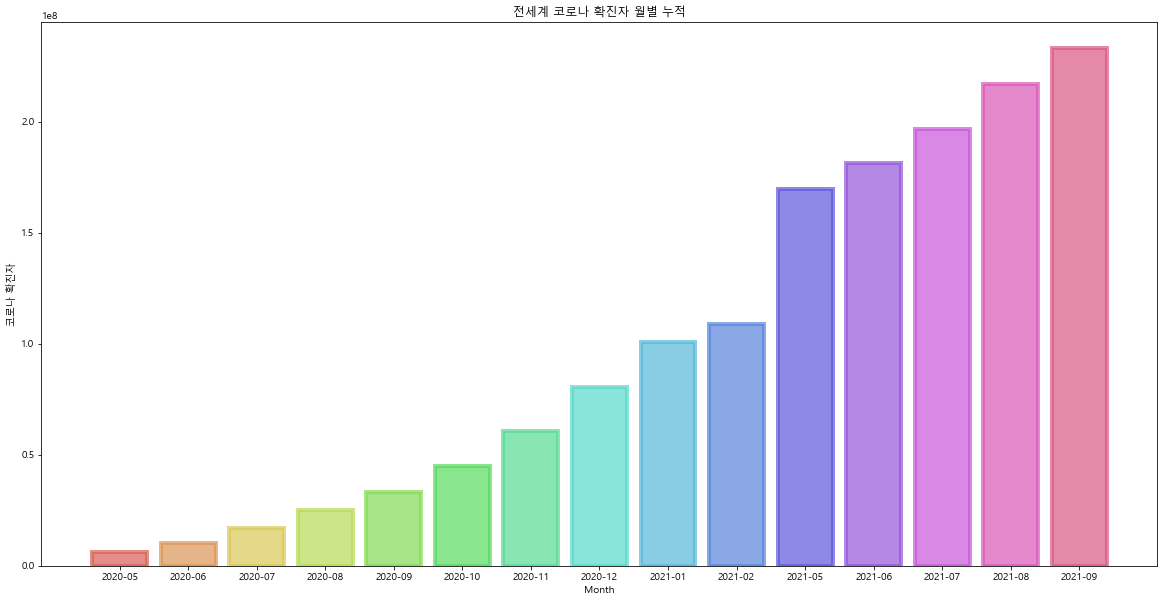

In [125]:
x1 = covid_month['Month']
y1 = covid_month['month_Total']
    
plt.figure(figsize=(20,10)) 

colors = sns.color_palette('hls',len(x1)) ## 색상 지정
xtick_label_position = list(range(len(x1))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, x1) ## x축 눈금 라벨 출력
    
     
plt.bar(xtick_label_position, y1, color=colors,edgecolor=colors, alpha=0.7, linewidth=4)
plt.xlabel('Month')
plt.ylabel('코로나 확진자')
plt.title('전세계 코로나 확진자 월별 누적')
plt.show()

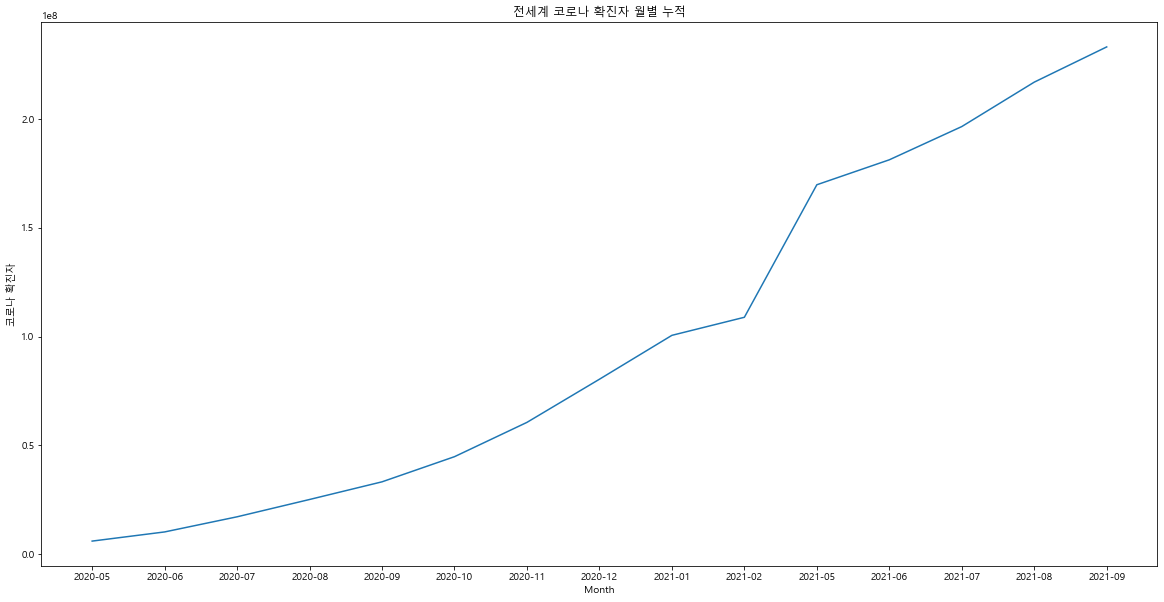

In [126]:
plt.figure(figsize=(20,10))
plt.plot(covid_month['Month'], covid_month['month_Total'])
plt.xlabel('Month')
plt.ylabel('코로나 확진자')
plt.title('전세계 코로나 확진자 월별 누적')
plt.show()

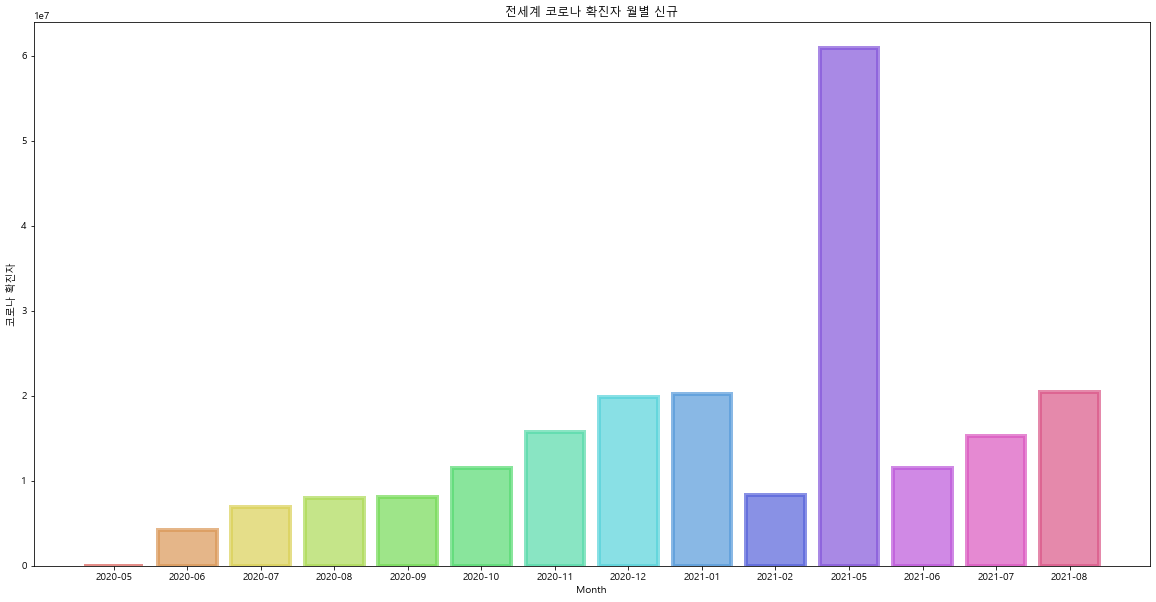

In [127]:
x2 = covid_month['Month'].iloc[:-1]
y2 = covid_month['month_new'].iloc[:-1]
    
plt.figure(figsize=(20,10)) 

colors = sns.color_palette('hls',len(x2)) ## 색상 지정
xtick_label_position = list(range(len(x2))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, x2) ## x축 눈금 라벨 출력
    
     
plt.bar(xtick_label_position, y2, color=colors,edgecolor=colors, alpha=0.7, linewidth=4)
plt.xlabel('Month')
plt.ylabel('코로나 확진자')
plt.title('전세계 코로나 확진자 월별 신규')
plt.show()

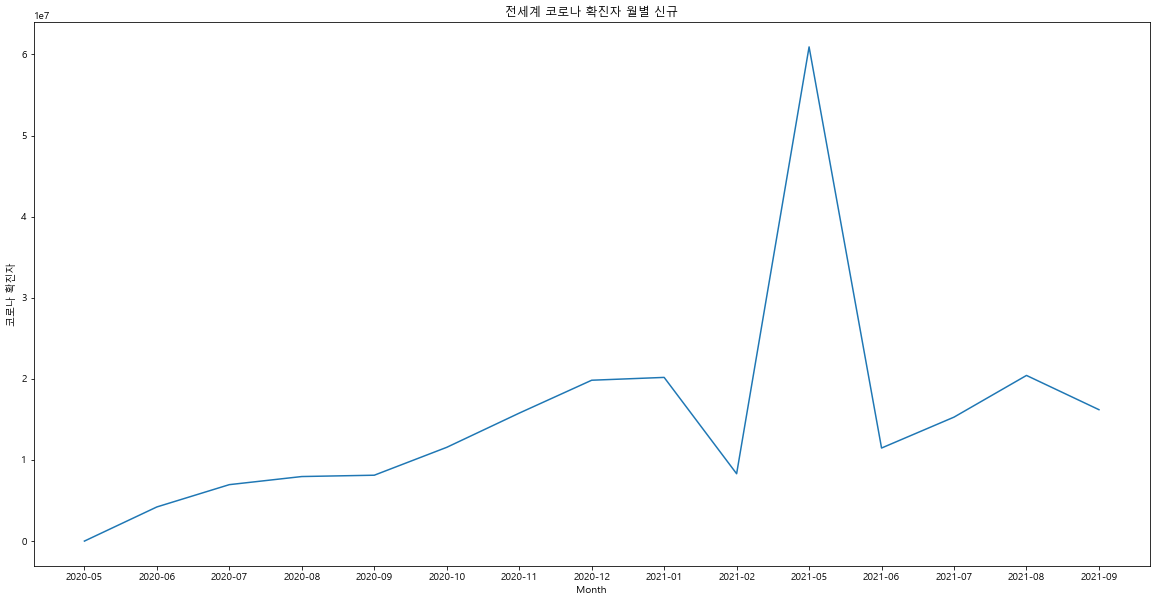

In [128]:
plt.figure(figsize=(20,10))
plt.plot(covid_month['Month'], covid_month['month_new'])
plt.xlabel('Month')
plt.ylabel('코로나 확진자')
plt.title('전세계 코로나 확진자 월별 신규')
plt.show()

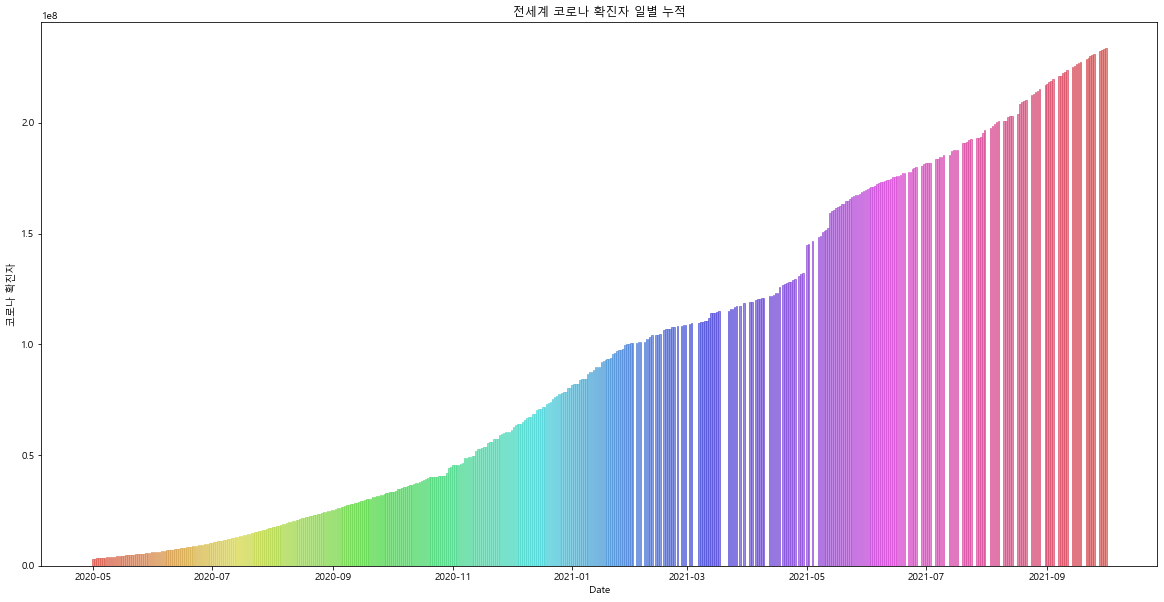

In [129]:
plt.figure(figsize=(20,10)) 

colors = sns.color_palette('hls',len(covid_df_day)) ## 색상 지정
    
     
plt.bar(covid_df_day['Date'], covid_df_day['day_Total'], color=colors, edgecolor=colors, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('코로나 확진자')
plt.title('전세계 코로나 확진자 일별 누적')
plt.show()

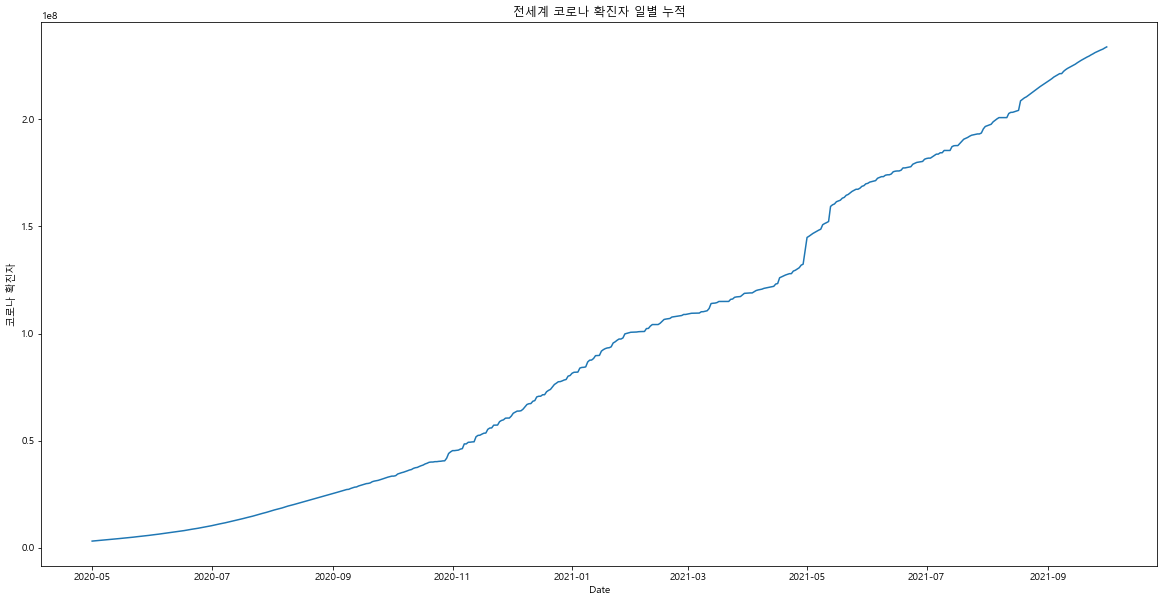

In [130]:
plt.figure(figsize=(20,10))
plt.plot(covid_df_day['Date'], covid_df_day['day_Total'])
plt.xlabel('Date')
plt.ylabel('코로나 확진자')
plt.title('전세계 코로나 확진자 일별 누적')
plt.show()

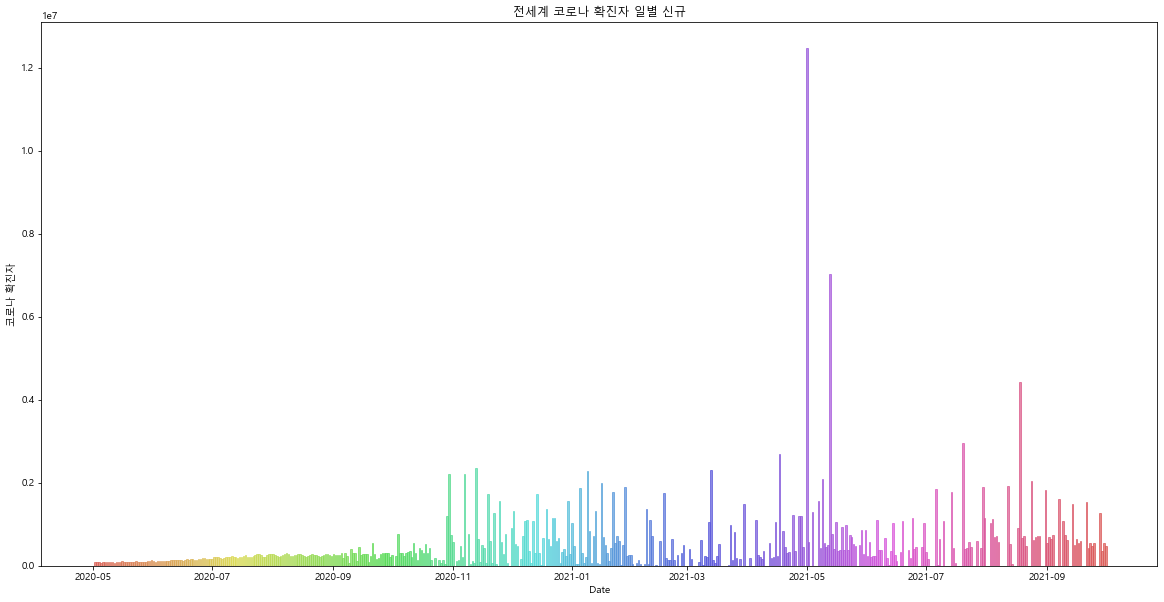

In [131]:
plt.figure(figsize=(20,10)) 

colors = sns.color_palette('hls',len(covid_df_day)) ## 색상 지정
    
     
plt.bar(covid_df_day['Date'], covid_df_day['day_new'], color=colors, edgecolor=colors, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('코로나 확진자')
plt.title('전세계 코로나 확진자 일별 신규')
plt.show()

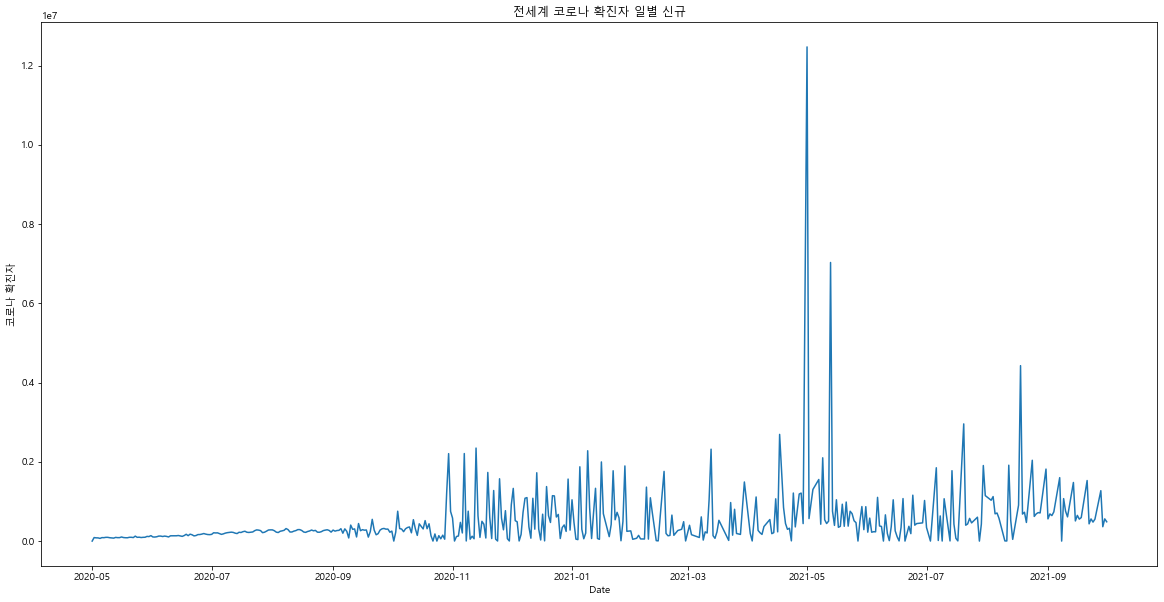

In [132]:
plt.figure(figsize=(20,10))
plt.plot(covid_df_day['Date'], covid_df_day['day_new'])
plt.xlabel('Date')
plt.ylabel('코로나 확진자')
plt.title('전세계 코로나 확진자 일별 신규')
plt.show()